In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees

In [2]:
df = pd.read_csv('../../Data/Chapter_1_cleaned_data.csv')

In [3]:
features_response = df.columns.tolist()

In [4]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

In [5]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [7]:
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values,
                 df['default payment next month'].values,
                 test_size=0.2, random_state=24)

# Exercise 20: Finding Optimal Hyperparameters for a Decision Tree

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
X_train.shape

(21331, 17)

In [10]:
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]}
# params = {'max_depth':list(range(1,13))}

In [11]:
dt = tree.DecisionTreeClassifier()

In [12]:
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
                  n_jobs=None, refit=True, cv=4, verbose=1,
                  pre_dispatch=None, error_score=np.nan,
                  return_train_score=True)

In [13]:
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    3.5s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [14]:
# cv.cv_results_

In [15]:
cv_results_df = pd.DataFrame(cv.cv_results_)

In [16]:
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.039944,0.006213,0.008777,0.003006,1,{'max_depth': 1},0.639514,0.643398,0.651891,0.650753,0.646389,0.005136,7,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
1,0.055477,0.017694,0.004633,0.003089,2,{'max_depth': 2},0.695134,0.699022,0.713376,0.699510,0.701761,0.006917,5,0.704034,0.702700,0.698113,0.702535,0.701845,0.002232
2,0.071190,0.004015,0.002782,0.000181,4,{'max_depth': 4},0.732720,0.741078,0.746946,0.743731,0.741119,0.005276,2,0.756882,0.752421,0.749368,0.753055,0.752932,0.002673
3,0.115472,0.005683,0.004624,0.000268,6,{'max_depth': 6},0.745252,0.746910,0.751881,0.740677,0.746180,0.004005,1,0.782202,0.780044,0.775228,0.774750,0.778056,0.003165
4,0.142246,0.013853,0.003711,0.000533,8,{'max_depth': 8},0.728873,0.731288,0.750139,0.730636,0.735234,0.008651,3,0.811837,0.808353,0.803554,0.802003,0.806437,0.003899
5,0.179756,0.015477,0.003947,0.000863,10,{'max_depth': 10},0.707656,0.705151,0.719657,0.711638,0.711026,0.005494,4,0.848931,0.854216,0.841353,0.836543,0.845261,0.006800
6,0.190640,0.016620,0.003270,0.000295,12,{'max_depth': 12},0.674816,0.656654,0.678110,0.678742,0.672081,0.009031,6,0.888229,0.903430,0.885347,0.875493,0.888125,0.010019


In [17]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

Text(0, 0.5, 'ROC AUC')

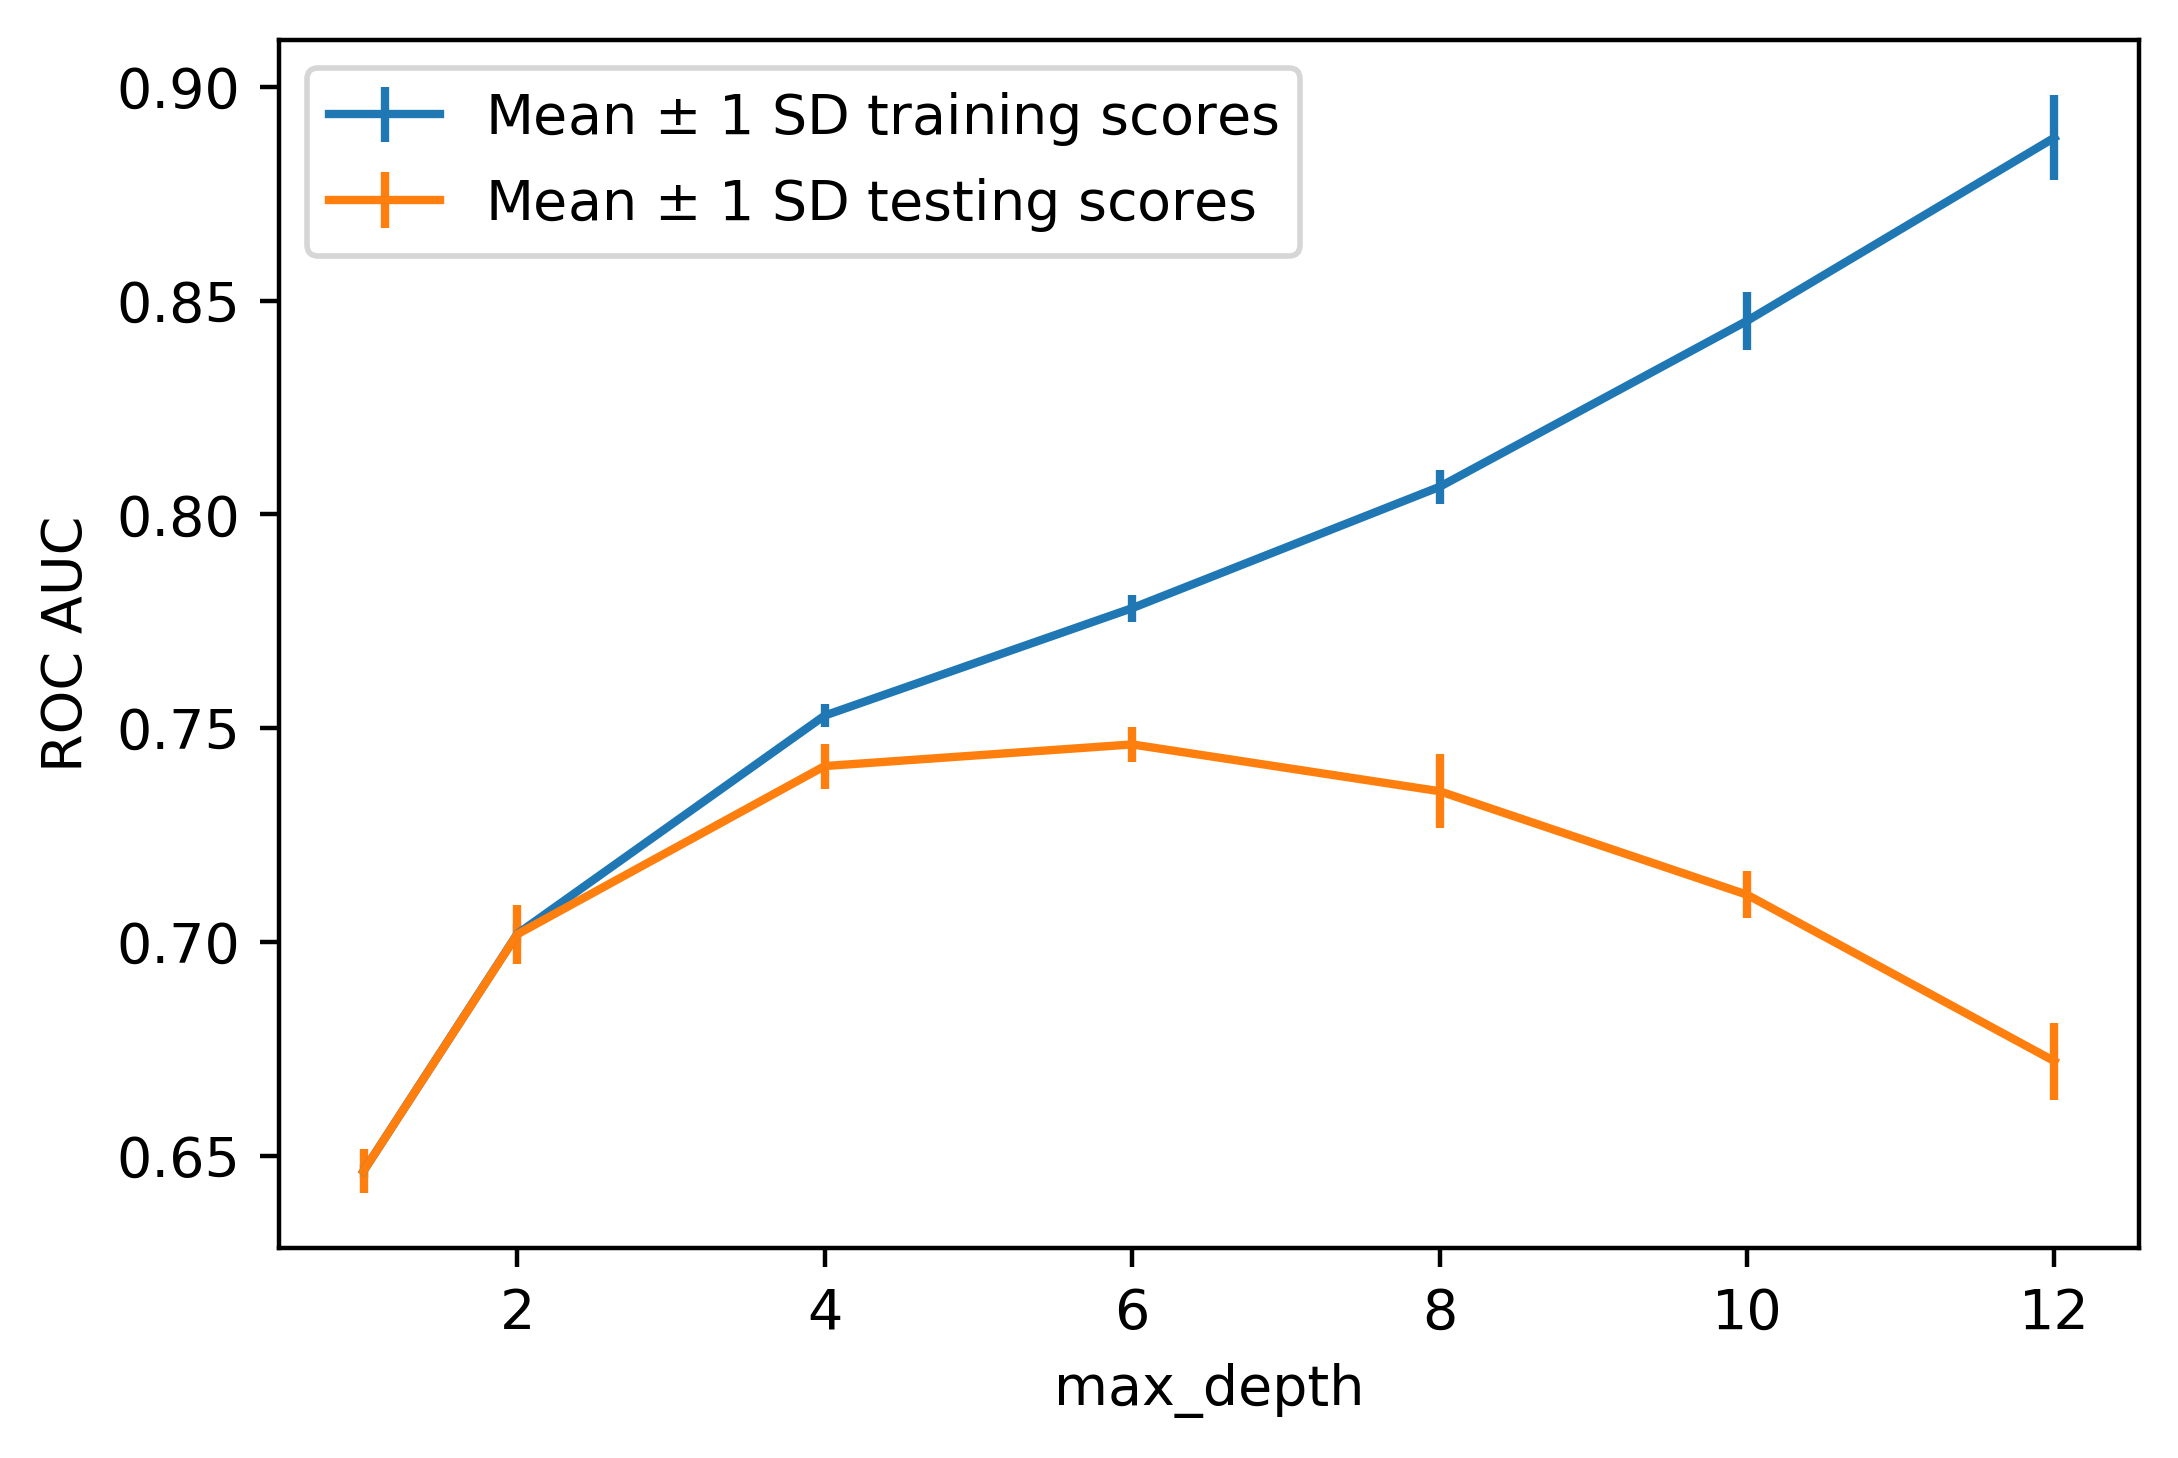

In [18]:
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score'],
            label='Mean $\pm$ 1 SD training scores')
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score'],
            label='Mean $\pm$ 1 SD testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

In [19]:
cv_results_df.max()

mean_fit_time          0.19064
std_fit_time          0.017694
mean_score_time       0.008777
std_score_time        0.003089
param_max_depth             12
split0_test_score     0.745252
split1_test_score      0.74691
split2_test_score     0.751881
split3_test_score     0.743731
mean_test_score        0.74618
std_test_score        0.009031
rank_test_score              7
split0_train_score    0.888229
split1_train_score     0.90343
split2_train_score    0.885347
split3_train_score    0.875493
mean_train_score      0.888125
std_train_score       0.010019
dtype: object